In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

In [2]:
def gramacy_lee(x: float) -> float:
    "Gramacy & Lee (2012) Function"
    return np.sin(10 * np.pi * x) / (2 * x) + (x - 1) ** 4

In [3]:
def target_func(x: float) -> float:
    return (gramacy_lee(x * 2e-6 + 0.5) + 3.0) * 0.2

FUNC_DOMAIN = (0, 1000000)
FUNC_RANGE = (0.2, 1.8)

In [4]:
NUM_SAMPLES = 5

In [5]:
df_grid = pandas.DataFrame({"x": np.linspace(*FUNC_DOMAIN, NUM_SAMPLES)})
df_grid["y"] = df_grid.x.apply(target_func)
df_grid

,x,y
0,0.0,0.6125
1,250000.0,0.6000
2,500000.0,0.6125
3,750000.0,0.8000
4,1000000.0,1.6125


In [6]:
np.random.seed(45)
df_rand = pandas.DataFrame({"x": np.random.uniform(*FUNC_DOMAIN, NUM_SAMPLES)})
df_rand["y"] = df_rand.x.apply(target_func)
# df_rand.head(5)

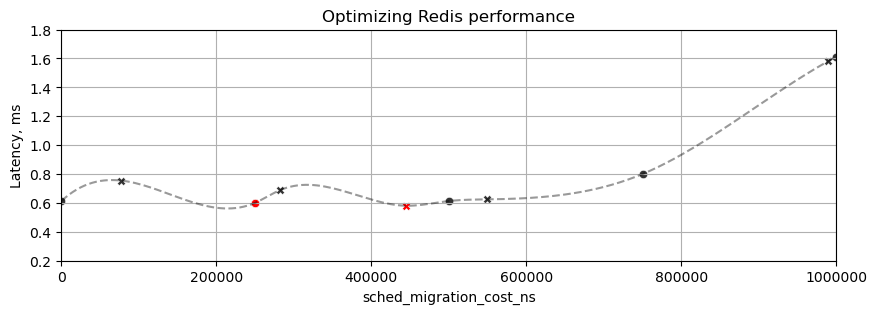

In [7]:
plt.rcParams["figure.figsize"] = (10, 3)

sns.scatterplot(data=df_grid, x="x", y="y", marker='o', color="black", alpha=0.8)
sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]],
                x="x", y="y", marker='o', color="red", alpha=1)

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.8)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]],
                x="x", y="y", marker='X', color="red", alpha=1)

x = np.concatenate([df_grid.x, df_rand.x])
x.sort()
func_interp = interp1d(x, target_func(x), kind='cubic')
x_interp = np.linspace(*FUNC_DOMAIN, 201)
y_interp = func_interp(x_interp)

sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.4, linestyle='--')

plt.xlim(*FUNC_DOMAIN)
plt.ylim(*FUNC_RANGE)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel("sched_migration_cost_ns")
plt.ylabel("Latency, ms")

plt.title("Optimizing Redis performance")
plt.grid()
plt.show()